In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

def make_hello(N=1000, rseed=42):
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)   

    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T   
    print("이미지차원", data.shape)
   
    print(data)
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    print("만든 갯수",X.shape)
    print((X * data.shape).shape)
    i, j = (X * data.shape).astype(int).T
   
    mask = (data[i, j] < 1)
    X = X[mask]
    print("새로운X갯수", X.shape)
    print("원래이미지의 차수 ", data.shape)
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]

    return X[np.argsort(X[:, 0])]

이미지차원 (288, 72)
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
만든 갯수 (4000, 2)
(4000, 2)
새로운X갯수 (1532, 2)
원래이미지의 차수  (288, 72)


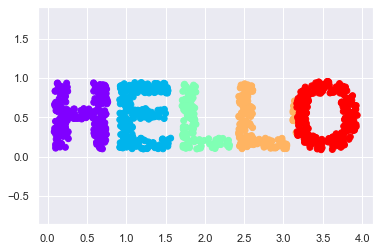

In [2]:
X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))

plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

(1000, 2)
<class 'list'>


(4.597858810380142, 8.755757454950324, 5.020644928025307, 7.258448710811383)

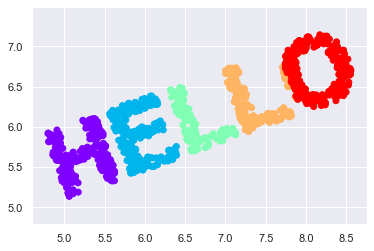

In [3]:
print(X.shape)
def rotate(X, angle):
    theta = np.deg2rad(angle) # 라디안 - 호의 길이
    R = [[np.cos(theta), np.sin(theta)], # 2차원 행렬 회전
        [-np.sin(theta), np.cos(theta)]]
    print(type(R))
    return np.dot(X,R) # 1000x2 2x2 => 1000x2
X2 = rotate(X, 20) + 5
plt.scatter(X2[:,0], X2[:,1], **colorize)
plt.axis('equal')

(1000, 2)
<class 'list'>


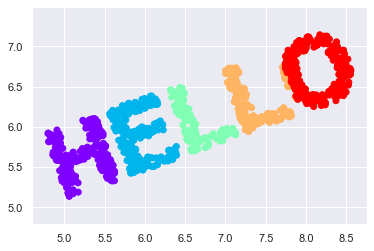

In [4]:
print(X.shape)
def rotate(X, angle):
    theta = np.deg2rad(angle) # 라디안 - 호의길이
    R = [[np.cos(theta), np.sin(theta)], # 2차원 행렬회전 # cos값은 1 -> x축 , 이때 y축은0 이어야 하므로 sin
        [-np.sin(theta), np.cos(theta)]]
    print(type(R))
    return np.dot(X,R) # 1000 곱하기 2 # R은 2x2 # 결과는 1000x2
X2 = rotate(X,20) + 5 # 20도 회전 # 5는 그자리에서 돌면 딸리니 위로 올려준것. 
plt.scatter(X2[:,0], X2[:,1], **colorize)
plt.axis('equal');

(1000, 1000)


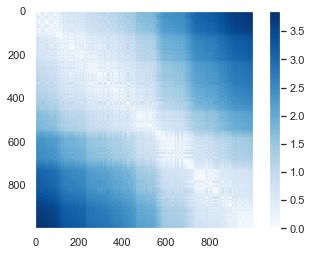

In [5]:
# 각 점들 간의 상호거리 (Euclidian Distance)
from sklearn.metrics import pairwise_distances # 디폴트 - 유클리디안
D = pairwise_distances(X)
print(D.shape)
D[:5,:5]
plt.imshow(D, zorder = 2, cmap='Blues', interpolation = 'nearest')
plt.colorbar()

In [6]:
D2 = pairwise_distances(X2)
np.allclose(D, D2) # 원형을 유지하고 있음

True

[[-0.74494191 -1.70588632]
 [-0.41295504 -1.81002158]
 [-0.73486201 -1.70435097]
 ...
 [ 0.75145058  1.84680917]
 [ 0.4906357   1.9307466 ]
 [ 0.63071876  1.89955864]]


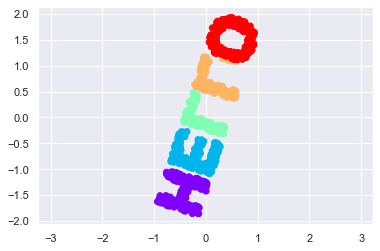

In [7]:
# 다형체
from sklearn.manifold import MDS
# 미리 계산된 거리행렬을 이용해 차원 축소함
model = MDS(n_components = 2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)
plt.scatter(out[:,0], out[:,1], **colorize)
plt.axis('equal');
print(out)

In [8]:
# 고유값 분해
import numpy as np
rng = np.random.RandomState(10) # seed 값
C = rng.randn(3,3) # normal
print(np.dot(C,C.T))
# 정방행렬, 대칭행렬
# 고유값 분해
e, V = np.linalg.eigh(np.dot(C, C.T))
print("eigenvector", V) # 고유벡터
print('eigenvalue', e) # 고유값
np.dot(V[1], V[2]) # 두 벡터의 내적 -> 직교한다

[[4.67300869 1.54608517 0.42456214]
 [1.54608517 0.9046519  0.0621289 ]
 [0.42456214 0.0621289  0.0822976 ]]
eigenvector [[-0.15797077 -0.30570231 -0.93893095]
 [ 0.20981122  0.9187662  -0.33443672]
 [ 0.9648961  -0.24982947 -0.08099843]]
eigenvalue [0.02629875 0.37332691 5.26033253]


-3.122502256758253e-17

In [9]:
# 2차원 -> 3차원 변환
def random_projection(X, dimension=3, rseed=42): # 데이터, 차원, 시드
    assert dimension >= X.shape[1] # 차원축소는 안되고 차원 확대만 가능. shape[1]은 행. 변수 2개면 2차원
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension) # 3x3
    print("C는", C.shape) # 3x3
    print(np.dot(C, C.T))
    e, V = np.linalg.eigh(np.dot(C, C.T)) # 고유치, 고유벡터
    print('V는', V.shape) # 3x3
    print('차원은', V[:X.shape[1]]) # 2차원
    return np.dot(X, V[:X.shape[1]]) # 3x2
print(X.shape)
print(X.shape[1])
print("데이터의 차원은", X.shape)
X3 = random_projection(X, 3)
X3.shape

(1000, 2)
2
데이터의 차원은 (1000, 2)
C는 (3, 3)
[[0.68534241 0.63723771 0.37423535]
 [0.63723771 2.42926786 2.33541214]
 [0.37423535 2.33541214 3.30327538]]
V는 (3, 3)
차원은 [[-0.63360361  0.75939282  0.14788172]
 [ 0.64803399  0.41652241  0.63762139]]


(1000, 3)

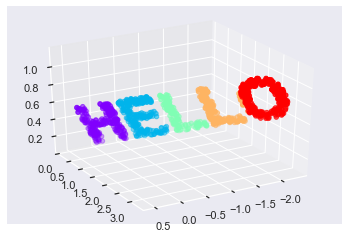

In [10]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:,0], X3[:, 1], X3[:,2], **colorize)
ax.view_init(azim=60, elev=30) # 카메라 각도 조절

(-1.0390064107727621,
 1.0377133989963219,
 -2.0646660054511297,
 2.135458244484912)

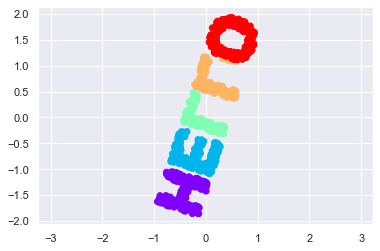

In [11]:
model = MDS(n_components =2, random_state=1)
out3 = model.fit_transform(X3)
plt.scatter(out3[:,0], out3[:,1], **colorize)
plt.axis('equal')

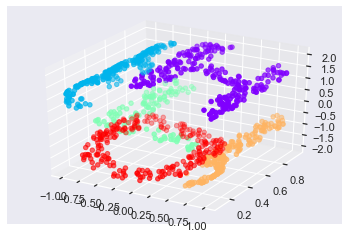

In [12]:
def make_hello_s_curve(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x,y,z)).T

XS = make_hello_s_curve(X)
ax = plt.axes(projection = '3d')
ax.scatter3D(XS[:,0], XS[:,1],XS[:,2], **colorize)

# MDS는 선형에는 강하지만 비선형에는 취약하다

(-1.3226393849603086,
 1.1799486556119945,
 -2.1918230064186113,
 2.3891359457585013)

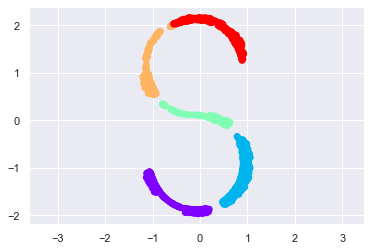

In [13]:
# MDS는 비선형에서 모양유지가 안됨
model = MDS(n_components =2, random_state=1)
out3 = model.fit_transform(XS)
plt.scatter(out3[:,0], out3[:,1], **colorize)
plt.axis('equal')

# LLE(Locally Linear Embedding)
- 비선형에 강함

(0.15, -0.15)

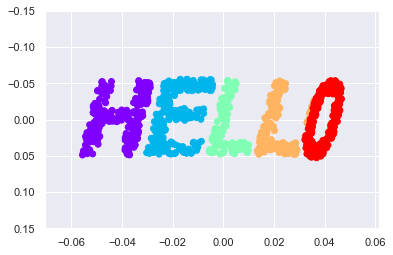

In [14]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified', eigen_solver='dense')
out = model.fit_transform(XS)
fig,ax = plt.subplots()
ax.scatter(out[:,0], out[:,1], **colorize)
ax.set_ylim(0.15, -0.15)

In [15]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn import manifold # 다형체
from matplotlib import pylab
from sklearn.manifold import MDS
from mpl_toolkits import mplot3d # 3차원 출력 위한 패키지
import os # 디렉터리 관리
CHART_DIR = './'
colors = ['r','g','b']
markers = ['o', 6, '*']
def plot_iris_mds():
    iris = load_iris()
    X = iris.data
    y = iris.target
    fig = pylab.figure(figsize=(10, 4))
    ax = fig.add_subplot(121, projection='3d')
    ax.set_facecolor('white') # 바탕색 컬러
    mds = manifold.MDS(n_components=3) # iris 데이터셋의 변수 4개를 3차원으로 표현
    Xtrans = mds.fit_transform(X) # 150x3
    for cl, color, marker in zip(np.unique(y), colors, markers): # unique 3개
        ax.scatter(
            Xtrans[y == cl][:, 0], Xtrans[y == cl][:, 1], Xtrans[y == cl][:, 2], c=color, marker=marker, edgecolor='black')
    pylab.title("3차원에서 iris MDS")
    ax.view_init(10, -15) # 카메라 각도 조절

    mds = manifold.MDS(n_components=2) 
    Xtrans = mds.fit_transform(X) 

    ax = fig.add_subplot(122)
    for cl, color, marker in zip(np.unique(y), colors, markers):
        ax.scatter(
            Xtrans[y == cl][:, 0], Xtrans[y == cl][:, 1], c=color, marker=marker, edgecolor='black')
    pylab.title("2차원에서 iris MDS")

    filename = "mds_demo_iris.png"
    pylab.savefig(os.path.join(CHART_DIR, filename), bbox_inches="tight")
    

C:\Users\ICT01_04\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_04\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_04\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_04\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_04\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ICT01_04\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 5089

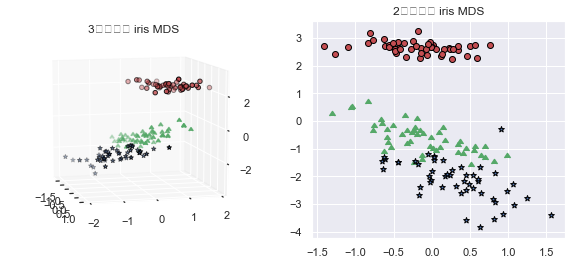

In [16]:
plot_iris_mds()

In [17]:
# kmeans: 군집 분석 => 종속변수결정, 
- 압축: 팔레트(RGB컬러 준비), 실제 데이터에는 팔레트 번호를 넣음(256 -> 1바이트로 표현 가능)
- 원형 이상치 제거
- 미리 군집화해서 문제 해결에 도움을 줌
# 알고리즘 - k값을 결정(군집수결정), 중심값
- 문제점: 이상치에 민감
# kmeans(중심간의 거리)의 척도: 거리값 (거리값은 피타고라스 정리로 구함 -> euclidean distance)
# DBSCAN(이웃간의 거리): EPS 기본 거리값, 군집이 되기 위한 최소 요소수
- 핵심, 경계, 어느 군집에도 속하지 않는 것 - 3가지로 나뉘어 생김
# kmeans가 더 많이 쓰임

SyntaxError: invalid syntax (<ipython-input-17-901c13fe1dcd>, line 2)

In [18]:
import numpy as np
import scipy
import sklearn.metrics.pairwise

a_64 = np.array([61.22, 71.60, -65.755], dtype = np.float64)
b_64 = np.array([61.22, 71.608, -65.72], dtype = np.float64)
a_32 = a_64.astype(np.float32)
b_32 = b_64.astype(np.float32)
# norm 원점으로부터의 크기(단일)
dist_64_np = np.array([np.linalg.norm(a_64 - b_64)], dtype=np.float64)
dist_32_np = np.array([np.linalg.norm(a_32 - b_32)], dtype=np.float32)
# euclidean distance - 특성이 가까운 놈들인지 구별하기 위해 거리값을 구하는 것이다.
dist_64_sklearn = sklearn.metrics.pairwise.pairwise_distances([a_64],[b_32], 
                                                              metric="manhattan") # metric이 없으면 기본값은 유클리디안 거리
from sklearn.metrics.pairwise import euclidean_distances

In [19]:
from sklearn.svm import SVC # Classification 분류
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler # kmeans, PCA는 전처리에 민감
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

scaler = MinMaxScaler().fit(X_train) # chaining
X_train_scaled = scaler.transform(X_train)
svm = SVC()
svm.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
print("테스트 점수: {:.2f}". format(svm.score(X_test_scaled, y_test)))

테스트 점수: 0.95


C:\Users\ICT01_04\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [20]:
# 격자: 그물망
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'gamma':[0.001,0.01,0.1, 1, 10, 100]}
grid = GridSearchCV(SVC(),param_grid=param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
print("최상의 교차 검증 정확도: {:.2f}".format(grid.best_score_))
print("테스트 점수: {:.2f}".format(grid.score(X_test_scaled, y_test)))
print("최적의 매개변수: ", grid.best_params_)

최상의 교차 검증 정확도: 0.98
테스트 점수: 0.97
최적의 매개변수:  {'C': 1, 'gamma': 1}


In [21]:
from sklearn.pipeline import Pipeline
# 참조: 파라미터 전달
pipe = Pipeline([("scaler", MinMaxScaler()), ('svm',SVC())])
pipe.fit(X_train, y_train)
print("테스트 점수: {:.2f}".format(pipe.score(X_test, y_test)))

테스트 점수: 0.95


C:\Users\ICT01_04\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [22]:
# 파이프를 이용했기 때문에 아래처럼 바꿔줘야 함
# pipeline + GridSearchCV은 다양한 테스트 문제를 해결
# 격자: 그물망
from sklearn.model_selection import GridSearchCV
# regularization(규제): 과적합 방지. 규제 정도 = C
# param_grid 파트가 중요. 얘를 써야 편해짐. 아니면 일일이 값을 넣어야 함
param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100], # 처음에는 대충
             'svm__gamma':[0.001,0.01,0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
print("최상의 교차 검증 정확도: {:.2f}".format(grid.best_score_))
print("테스트 점수: {:.2f}".format(grid.score(X_test_scaled, y_test)))
print("최적의 매개변수: ", grid.best_params_)

최상의 교차 검증 정확도: 0.98
테스트 점수: 0.97
최적의 매개변수:  {'svm__C': 1, 'svm__gamma': 1}


array([[5.90980392, 2.73529412],
       [6.85348837, 3.1       ],
       [5.1875    , 3.6375    ],
       [4.76666667, 2.89166667]])

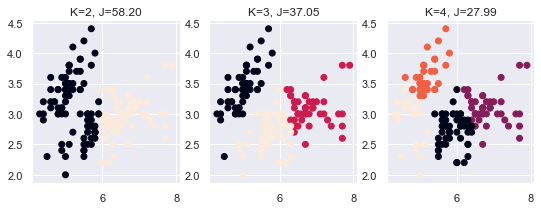

In [23]:
# 초기 중심값이 결정 입력 => 중심을 지속적으로 변화 (fix되어서 안움직일 때까지 변화)
# 중심과의 거리 값
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
iris = datasets.load_iris()
X = iris.data[:, :2]
y_iris = iris.target
km2 = cluster.KMeans(n_clusters=2).fit(X)
km3 = cluster.KMeans(n_clusters=3).fit(X)
km4 = cluster.KMeans(n_clusters=4).fit(X)
plt.figure(figsize=(9,3)); plt.subplot(131)
plt.scatter(X[:,0], X[:,1], c=km2.labels_)
plt.title("K=2, J=%.2f" % km2.inertia_) # inertia: 군집 내부거리값
# 군집 번호: labels_
plt.subplot(132); plt.scatter(X[:,0],X[:,1], c=km3.labels_)
plt.title("K=3, J=%.2f" % km3.inertia_)
plt.subplot(133); plt.scatter(X[:,0],X[:,1], c=km4.labels_)
plt.title("K=4, J=%.2f" % km4.inertia_)
km4.cluster_centers_ # 중심값 구하기: 4개

[[7 5]
 [5 7]
 [7 7]
 [4 4]
 [4 6]
 [1 4]
 [0 0]
 [2 2]
 [8 7]
 [6 8]
 [5 5]
 [3 7]]


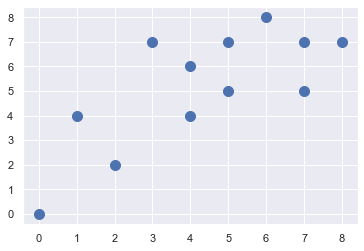

In [24]:
X = np.array([[7,5],[5,7],[7,7],[4,4],[4,6],[1,4], # 12x2
            [0,0],[2,2],[8,7],[6,8],[5,5],[3,7]])
print(X)
plt.scatter(X[:,0],X[:,1], s=100)
plt.show()

12


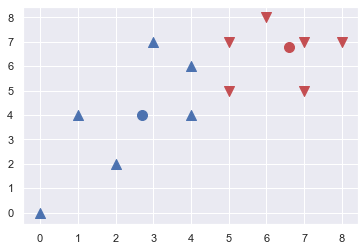

In [25]:
from sklearn.cluster import KMeans
# 레이블: 군집 번호 (관측치가 12개니까 레이블도 12개가 나옴): 종속변수. 클러스터가 2이니 중심점도 2개.
model = KMeans(n_clusters=2, init='random', n_init=1, max_iter=1, random_state=1).fit(X)
c0, c1 = model.cluster_centers_
print(len(model.labels_)) 
# 아래 이런 인덱싱 방법을 boolean indexing이라고 함. 라벨이 0인놈이 T or F
plt.scatter(X[model.labels_==0, 0], X[model.labels_ == 0, 1], s=100, marker = 'v', c='r') 
plt.scatter(X[model.labels_==1, 0], X[model.labels_ == 1, 1], s=100, marker = '^', c='b')  
plt.scatter(c0[0], c0[1], s=100, c='r')
plt.scatter(c1[0], c1[1], s=100, c='b')
plt.show()

In [26]:
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

In [27]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

In [28]:
n_colors = 64 # 색상 수 지정
# 1바이트 = 8비트. 표현종류 => 256
china = load_sample_image("flower.jpg") # RGB (256컬러: 1바이트)
china = np.array(china, dtype=np.float64) / 255 # 0부터 시작하기때문에 255까지. 컬러값 0~1 정규화.

In [29]:
w, h, d = original_shape = tuple(china.shape) # 이미지 사이즈가 행x열로 있고, 그 하나의 픽셀에 컬러값이 있다? 3
print(w, h, d) # 427*640, 3
assert d == 3 # RGB만 들어와라
image_array = np.reshape(china, (w*h, d)) # 2차원

427 640 3


In [30]:
# 1000개의 행
image_array_sample = shuffle(image_array, random_state=0)[:1000]
# 64컬러로 군집화(grouping) 
kmeans = KMeans(n_clusters = n_colors, random_state=0).fit(image_array_sample) # 64개의 중심값 결정됨 -> 이미지 예측

In [31]:
labels = kmeans.predict(image_array) # 라벨 427*640개 - 각 픽셀마다 번호(0~63 = 64개가 들어감

In [32]:
def recreate_image(codebook, labels, w, h): # 64 컬러값, 이미지 픽셀 수만큼 레이블이 들어왔다
    d = codebook.shape[1] # 64개의 중심값. rgb 3개. 64x3. d=3
    image = np.zeros((w,h,d)) # 원래 이미지 사이즈
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

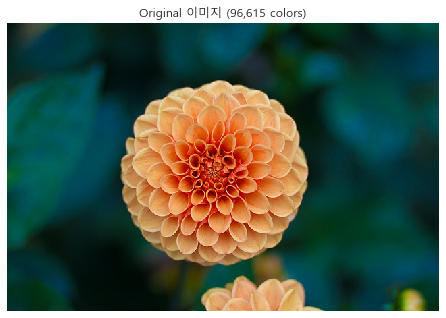

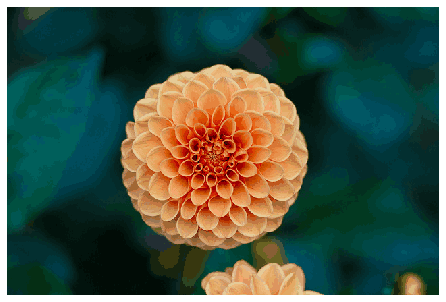

In [33]:
plt.figure(1)
plt.clf()
ax = plt.axes([0,0,1,1])
plt.axis('off')
plt.title('Original 이미지 (96,615 colors)')
plt.imshow(china)
plt.figure(2)
plt.clf()
ax = plt.axes([0,0,1,1])
plt.axis('off')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h)) # 64 컬러

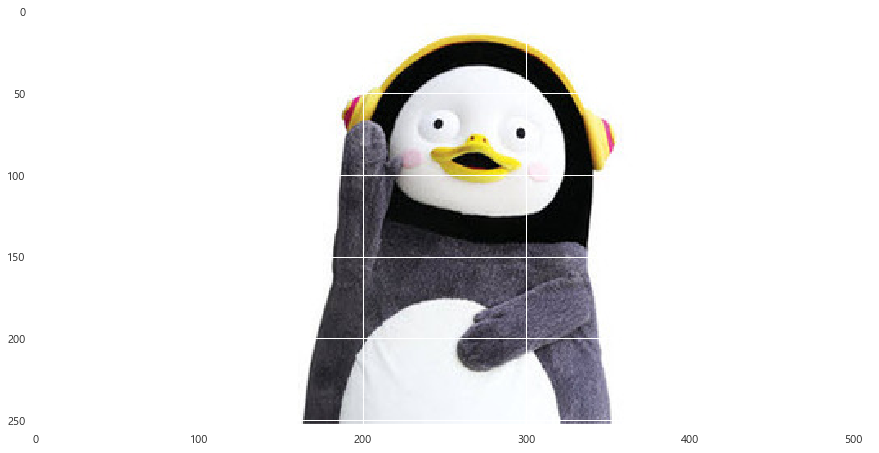

In [44]:
image = plt.imread('pengpeng.jpg')
plt.figure(figsize = (15,8))
plt.imshow(image)

In [45]:
image.shape

(253, 512, 3)

In [46]:
# 바이트 수
image.shape[0] * image.shape[1] * image.shape[2]

388608

In [47]:
x, y, z = image.shape
image = np.array(image, dtype=np.float64) / 255
image_2d = image.reshape(x*y,z) # kmeans는 3차원을 이해하지 못해서 2차원으로 해줌
image_2d.shape

(129536, 3)

In [48]:
kmeans_cluster = cluster.KMeans(n_clusters = 16) # 중심값 16개
kmeans_cluster.fit(image_2d)
cluster_centers = kmeans_cluster.cluster_centers_
cluster_centers

array([[0.94283277, 0.94967742, 0.96051299],
       [0.16952443, 0.15848737, 0.17973828],
       [0.44182505, 0.42587935, 0.50440471],
       [0.90028358, 0.81053314, 0.24240804],
       [0.99901564, 0.99930028, 0.99947687],
       [0.02982572, 0.03474048, 0.03268535],
       [0.29053869, 0.27825816, 0.32344471],
       [0.87305337, 0.87362345, 0.87694891],
       [0.75778523, 0.74219081, 0.74765784],
       [0.51155325, 0.29309881, 0.14352172],
       [0.95589656, 0.908992  , 0.52641578],
       [0.36362714, 0.34830149, 0.41505402],
       [0.74715465, 0.62111897, 0.19054253],
       [0.23003557, 0.21974145, 0.25203358],
       [0.87142857, 0.32577031, 0.54795518],
       [0.55793502, 0.54362035, 0.60437624]])

In [39]:
len(cluster_centers)

16

In [49]:
cluster_centers.shape

(16, 3)

In [50]:
cluster_labels = kmeans_cluster.labels_
cluster_labels

array([4, 4, 4, ..., 4, 4, 4])

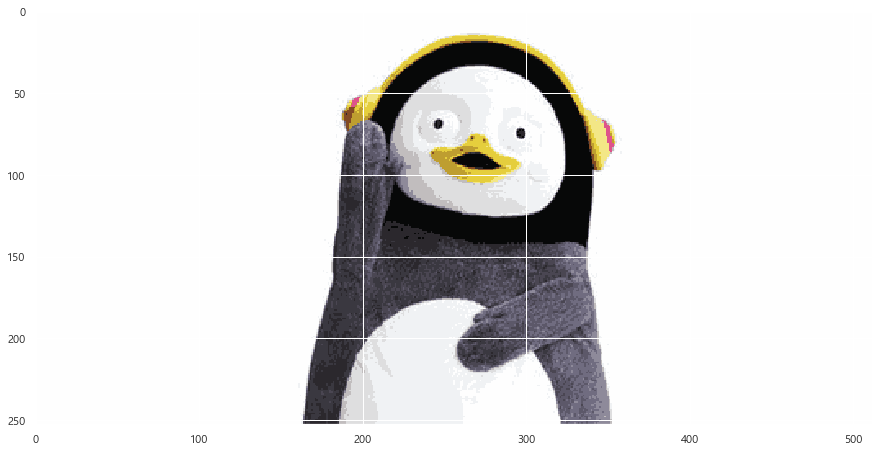

In [51]:
plt.figure(figsize=(15,8))
plt.imshow(cluster_centers[cluster_labels].reshape(x,y,z))

In [52]:
from sklearn.datasets import make_blobs
X, label = make_blobs(100, centers =1) # 중심이 하나인 데이터 100개

In [57]:
kmeans = KMeans(n_clusters=1) # 중심 1개
kmeans.fit(X)
distances = kmeans.transform(X) # 각 데이터의 중심으로부터의 거리로 변환됨
# ravel() 1차원
# 인덱스를 크기에 따라 정렬하라: argsort
# 2개가 있는 경우
# 내림차순으로 변경
sorted_idx = np.argsort(distances.ravel())[::-1][:5] # -1: 내림차순으로 하나씩 빼라

C:\Users\ICT01_04\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_04\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


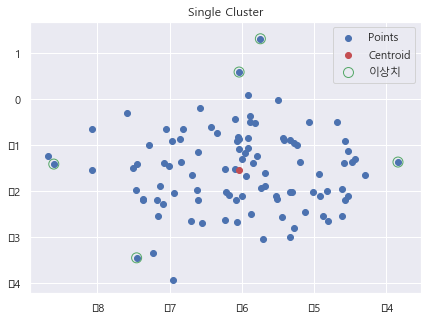

In [58]:
f, ax = plt.subplots(figsize=(7,5))
ax.set_title('Single Cluster')
ax.scatter(X[:,0], X[:,1], label='Points')
ax.scatter(kmeans.cluster_centers_[:, 0],
          kmeans.cluster_centers_[:, 1],
          label = 'Centroid', color='r')
ax.scatter(X[sorted_idx][:, 0],
          X[sorted_idx][:, 1],
          label = '이상치', edgecolors='g',
          facecolors='none', s=100)
ax.legend(loc='best')

In [62]:
# PCA: Principle Component Analysis 주성분 분석
# 모델 입력 전단에서 특징 추출(noise 제거하기 위함)
# PCA 결과를 모델의 변수로 추가하면 정확도가 상승
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components = 2) # 주성분 2개
pca.fit(X)
print(pca.explained_variance_ratio_) # 설명력
print(pca.explained_variance_) # 분산 큰 것이 주성분

[0.99244289 0.00755711]
[7.93954312 0.06045688]


# 차원 축소 후에 분석을 하면 좋은점
- 노이즈 제거
- (데이터 양이 많을 시) 속도 개선
- 차원의 저주 해결: 너무 차원이 많으면 복잡해서 문제 해결이 안됨.

In [63]:
# SVD: 희소행렬 특징 추출시 사용, 비정방행렬인 경우 사용
# 500 x 500
pca = PCA(n_components = 2, svd_solver = 'full') # 'randomized, arpack'
# Singular Value Decomposition
pca.fit(X)
print(pca.explained_variance_ratio_)

[0.99244289 0.00755711]


In [64]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
print(cancer.feature_names)
print(type(cancer))
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
print(type(X_train))
print(X_train.shape)
print(X_train.dtype)
print(X_test.shape)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'>
(426, 30)
float64
(143, 30)


In [65]:
from sklearn.svm import SVC
svm = SVC(C=100)
svm.fit(X_train, y_train)
print("테스트 세트 정확도: {:.2f}".format(svm.score(X_test, y_test)))

테스트 세트 정확도: 0.62


C:\Users\ICT01_04\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
svm.fit(X_train_scaled, y_train)
print("스케일 조정된 테스트 세트의 정확도: {:.2f}".format(svm.score(X_test_scaled, y_test)))

스케일 조정된 테스트 세트의 정확도: 0.97


C:\Users\ICT01_04\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [69]:
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled=scaler.transform(cancer.data)

[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]
원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 30)


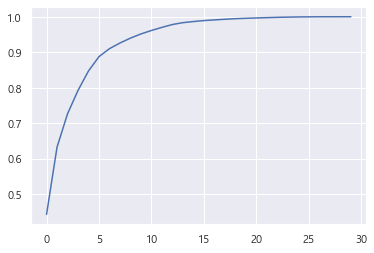

In [77]:
pca = PCA(n_components = 30) # '2' 입력시, 28개 제거 후 2개 남음
pca.fit(X_scaled)
# 2개의 주성분을 출력
X_pca = pca.transform(X_scaled)
print(pca.explained_variance_ratio_)
print("원본 데이터 형태: {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태: {}".format(str(X_pca.shape))) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) # elbow를 시각적으로 확인

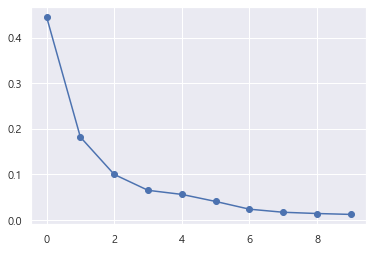

In [83]:
plt.plot(pca.explained_variance_ratio_, 'bo-')

In [94]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler() # Z점수 정규화
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.decomposition import PCA
pca = PCA(n_components = 6) # 전체 변수 30개.
pca.fit(X_train_scaled)
X_t_train = pca.transform(X_train_scaled)
X_t_test = pca.transform(X_test_scaled)
svm.fit(X_t_train, y_train)
print("SVM 테스트 정확도: {:.2f}".format(svm.score(X_t_test, y_test)))

# 1개 -> 92%
# 3개 -> 92%
# 6개 -> 92%
# 9개 -> 94%
# 15개 -> 94%
# 20개 -> 95%
# 30개 -> 97% / 3% 때문에 15개나 더 쓸 필요가 없다, 가성비가 낮다

SVM 테스트 정확도: 0.92


C:\Users\ICT01_04\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [96]:
print("PCA 주성분 형태: {}".format(pca.components_.shape)) # PCA 주성분 형태: (6, 30) <- 주성분 6개를 30개의 변수가 설명
# 변수의 기여도를 보고 명명식


PCA 주성분 형태: (6, 30)


In [99]:
print("PCA 주성분:\n {}".format(pca.components_))
# 6개의 성분이 나옴. 첫 성분에서 가장 큰 값인 9.2가 가장 큰 영향을 미쳤다

PCA 주성분:
 [[ 2.27727952e-01  1.15125429e-01  2.34880866e-01  2.29368295e-01
   1.34257906e-01  2.37160022e-01  2.57472643e-01  2.60831732e-01
   1.28883480e-01  4.44771262e-02  2.05926703e-01  1.45035459e-02
   2.10480600e-01  2.02438009e-01  1.01867571e-02  1.64939913e-01
   1.53175867e-01  1.78415012e-01  2.46122358e-02  9.25782919e-02
   2.32908159e-01  1.12324737e-01  2.40809688e-01  2.29457569e-01
   1.22454525e-01  2.08303026e-01  2.29910791e-01  2.49291962e-01
   1.15240250e-01  1.26763277e-01]
 [-2.15362267e-01 -6.01602111e-02 -1.97386080e-01 -2.12242935e-01
   1.93714685e-01  1.61665826e-01  6.56584195e-02 -2.40618685e-02
   1.88332406e-01  3.77871193e-01 -9.33235914e-02  1.04195564e-01
  -8.12542149e-02 -1.40402031e-01  2.19281447e-01  2.51896246e-01
   2.15694850e-01  1.53310362e-01  1.93854431e-01  3.02040600e-01
  -2.10358120e-01 -5.51038409e-02 -1.91044086e-01 -2.09342024e-01
   1.56961739e-01  1.32043594e-01  8.62556801e-02 -1.22824865e-02
   1.09276647e-01  2.71509521e-

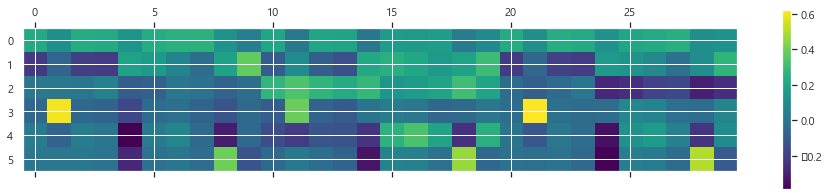

In [101]:
plt.matshow(pca.components_, cmap='viridis')
plt.colorbar()
# 노랭이가 가장 크게 영향을 미치는 애

(87, 65)


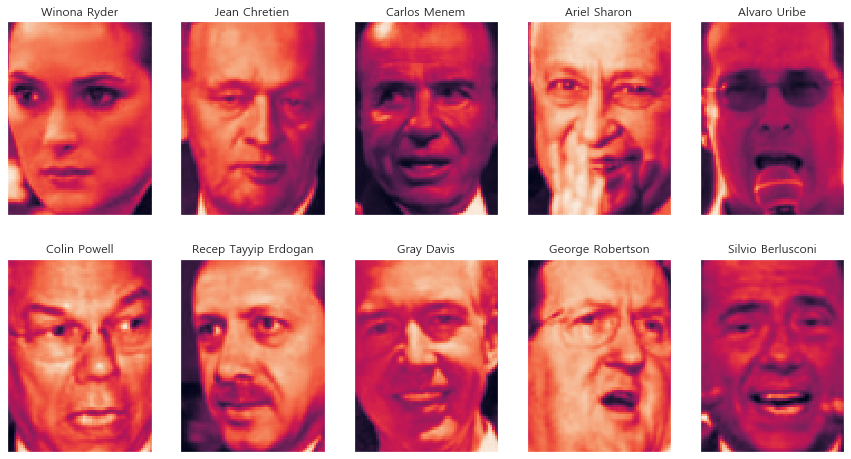

In [107]:
%matplotlib inline
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
people = fetch_lfw_people(min_faces_per_person=20, resize = 0.7) # 적어도 20장의 비슷한 얼굴이 있는 사람
image_shape = people.images[0].shape
print(image_shape) # 87(세로) * 65(가로), 이미지를 가로x세로, 행렬: 행부터
fig, axes = plt.subplots(2, 5, figsize=(15,8), subplot_kw={'xticks':(), 'yticks':()})
for target, image, ax in zip(people.target, people.images, axes.ravel()): 
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [108]:
print("이미지사이즈: {}".format(people.images.shape))
print("클래스 개수: {}".format(len(people.target_names)))


이미지사이즈: (3023, 87, 65)
클래스 개수: 62


In [114]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people /255.

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

In [117]:
from sklearn.decomposition import PCA
pca=PCA(n_components = 100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

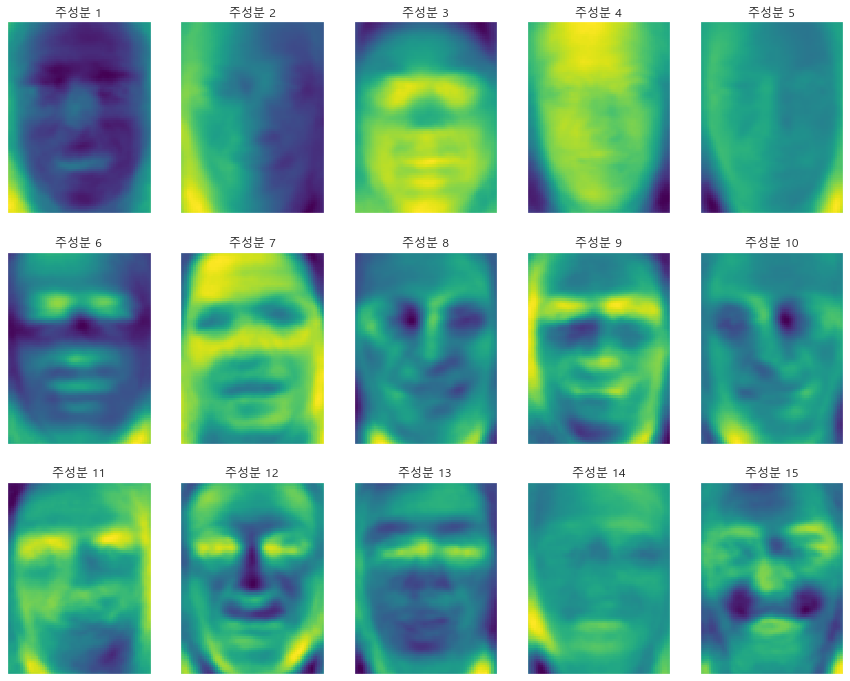

In [120]:
fig, axes = plt.subplots(3,5, figsize=(15,12), subplot_kw={'xticks':(), 'yticks':()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("주성분 {}".format((i+1)))
    
# 컴퓨터가 주성분분석을 통해 찾아낸 주성분
# 100개를 합하여 출력 원본이미지를 복원 => ANN의 가중치 특징도 설명할 수 없다